<a href="https://colab.research.google.com/github/AbdulhameedSk/Machine-Learning/blob/main/Multivariate_50_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#importing libraries and dataset
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASETS/50_Startups.csv')

In [31]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [43]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [45]:
df.shape

(50, 5)

In [48]:
d=df.corr()
d.shape

(4, 4)

In [44]:
import seaborn as sns

<Axes: >

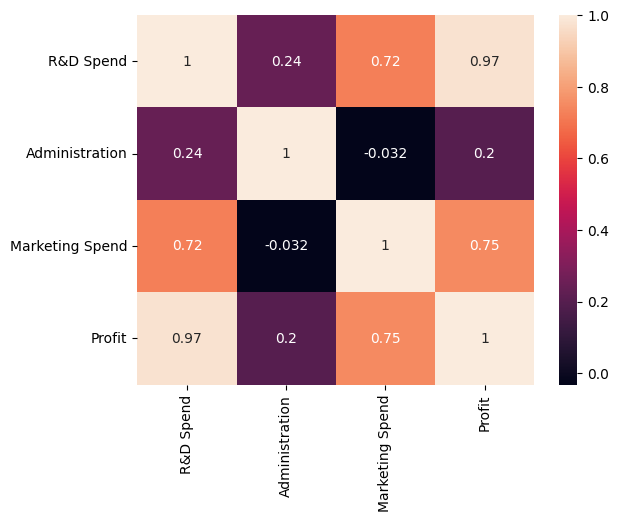

In [63]:
#drawing heatmap
sns.heatmap(df.corr(),annot=True)

In [64]:
# Selecting only the integer columns so that the string columns don't influence the model
# Selecting only integer datatypes using select_dtypes
X = df.iloc[:,:-1]
X = X.select_dtypes(include = np.number)
y = df.iloc[:,-1]
y = np.array(y)
y = y.reshape(-1,1)

In [65]:
X.shape,y.shape

((50, 3), (50, 1))

In [66]:
#splitting data into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state = 32)

In [68]:
X_train.shape,y_train.shape

((35, 3), (35, 1))

In [69]:
X_test.shape,y_test.shape

((15, 3), (15, 1))

In [74]:
# importing the linear_model
# For Uni_variate and Multi_Variate we use linear_model the only difference is in Linear X has a single feature while in Multi it has multiple features
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression

In [75]:
#Fitting a regression model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [81]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred1=reg.predict(X_train)
print(f'{mean_absolute_error(y_train,y_pred1)}')
print(f'MAE = {mean_absolute_error(y_train, y_pred1)}')
print(f'MSE = {mean_squared_error(y_train, y_pred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred1))}')
print(f'R_2 = {r2_score(y_train, y_pred1)}')

5485.293579118111
MAE = 5485.293579118111
MSE = 48804147.476301275
RMSE = 6985.996527074808
R_2 = 0.967462433557256


In [83]:
# Evaluating the model on testing data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred2 = reg.predict(X_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_pred2)}')
print(f'MSE = {mean_squared_error(y_test, y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'R_2 = {r2_score(y_test, y_pred2)}')

Performance of the model on test data :

MAE = 8838.451739639082
MSE = 151507501.20898917
RMSE = 12308.838337105139
R_2 = 0.9065521225506566


In [86]:
# importing Lasso
from sklearn.linear_model import Lasso     

In [89]:
reg=Lasso(alpha=0.50)
reg.fit(X_train,y_train)

Lasso(alpha=0.5)

In [90]:
# Evaluating the model on training data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_predict = reg.predict(X_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train, y_predict)}')
print(f'MSE = {mean_squared_error(y_train, y_predict)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_predict))}')
print(f'R_2 = {r2_score(y_train, y_predict)}')

Performance of the model on training data :

MAE = 5485.2935774803045
MSE = 48804147.476301216
RMSE = 6985.996527074803
R_2 = 0.967462433557256


In [92]:
# Evaluating the model on testing data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_predict2 = reg.predict(X_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_pred2)}')
print(f'MSE = {mean_squared_error(y_test, y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'R_2 = {r2_score(y_test, y_pred2)}')

Performance of the model on test data :

MAE = 8838.451748149617
MSE = 151507501.26603395
RMSE = 12308.838339422366
R_2 = 0.9065521225154722


In [94]:
from sklearn.linear_model import Ridge

In [95]:
reg=Ridge(alpha=0.64)

In [96]:
reg.fit(X_train,y_train)

Ridge(alpha=0.64)

In [97]:
# Evaluating the model on training data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_predict = reg.predict(X_train)
print(f'Performance of the model on training data :\n')
print(f'MAE = {mean_absolute_error(y_train, y_predict)}')
print(f'MSE = {mean_squared_error(y_train, y_predict)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_predict))}')
print(f'R_2 = {r2_score(y_train, y_predict)}')

Performance of the model on training data :

MAE = 5485.293579117337
MSE = 48804147.47630122
RMSE = 6985.996527074804
R_2 = 0.967462433557256


In [98]:
# Evaluating the model on testing data only
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_predict2 = reg.predict(X_test)
print(f'Performance of the model on test data :\n')
print(f'MAE = {mean_absolute_error(y_test, y_pred2)}')
print(f'MSE = {mean_squared_error(y_test, y_pred2)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'R_2 = {r2_score(y_test, y_pred2)}')

Performance of the model on test data :

MAE = 8838.451748149617
MSE = 151507501.26603395
RMSE = 12308.838339422366
R_2 = 0.9065521225154722
